In [1]:
import pandas as pd
import censusdata
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import glob
import seaborn as sb

%matplotlib inline
%config InlineBackend.figure_format ='retina'

sharedFolder = '/work/group/egodat/reu23_clark/'
dataFolder = sharedFolder + 'data/'

#Load states shapefile (for plotting) (https://www.census.gov/geographies/mapping-files/time-series/geo/carto-boundary-file.html under States)

statesShp = gpd.read_file(dataFolder + "/cb_2018_us_state_500k.zip").to_crs(3857)
statesShp = statesShp[['GEOID', 'STUSPS', 'NAME', 'geometry']]

def plotUS():
    ax = statesShp.plot(figsize=(20, 10))
    ax.axis('equal')
    plt.xlim(-1.5e7, -0.7e7)
    plt.ylim(2.5e6, 7e6)
    return ax

In [2]:
df10 = pd.read_pickle(dataFolder + "combined2010.pkl")
df15 = pd.read_pickle(dataFolder + "combined2015.pkl")
df19 = pd.read_pickle(dataFolder + "combined2019.pkl")
df20 = pd.read_pickle(dataFolder + "combined2020.pkl")
df21 = pd.read_pickle(dataFolder + "combined2021.pkl")

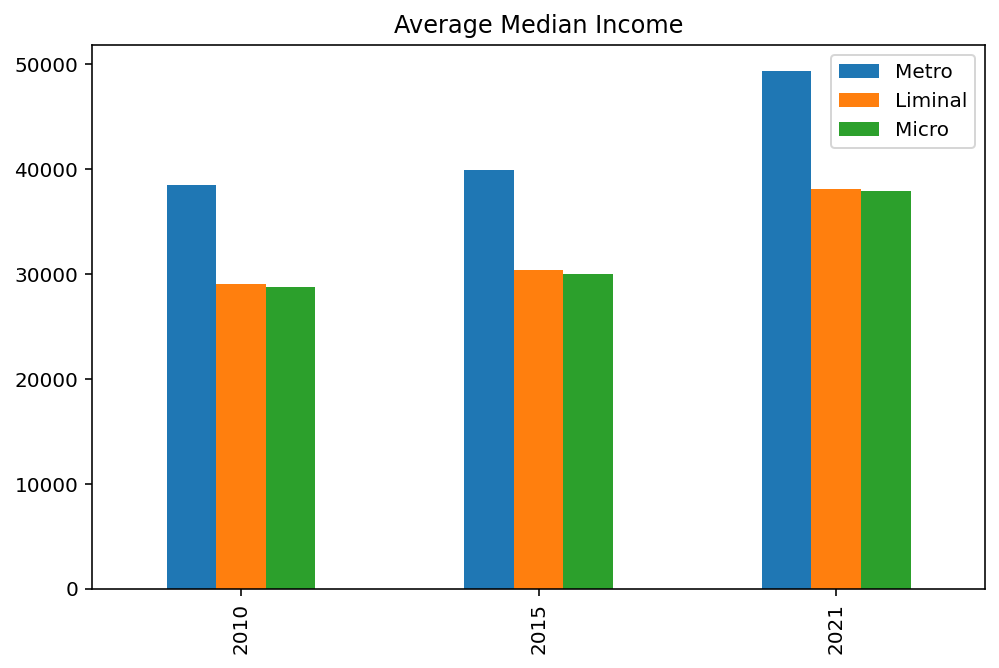

In [3]:
liminal = df19['liminal']
metro = df19['metro']
micro = df19['micro']
notLim = df19['micro'] & ~liminal
other = ~metro & ~micro

df = pd.DataFrame()

for dfY, year in [(df10, 2010), (df15, 2015), (df21, 2021)]:
    df.loc[year, 'Metro'] = (dfY[metro]['Median_Income'] * dfY[metro]['Num_Workers']).sum() / dfY[metro]['Num_Workers'].sum()
    df.loc[year, 'Liminal'] = (dfY[liminal]['Median_Income'] * dfY[liminal]['Num_Workers']).sum() / dfY[liminal]['Num_Workers'].sum()
    df.loc[year, 'Micro'] = (dfY[notLim]['Median_Income'] * dfY[notLim]['Num_Workers']).sum() / dfY[notLim]['Num_Workers'].sum()

df.plot(kind='bar', figsize=(8, 5))
plt.title("Average Median Income");

In [9]:
(dfY[metro]['Median_Income'] * dfY[metro]['Num_Workers'] / dfY[metro]['Num_Workers'].sum() * len(dfY[metro])).describe()

count        56.000000
mean      49381.078022
std       52673.874342
min        9204.595749
25%       19626.331115
50%       31151.311350
75%       57594.146464
max      331485.490951
dtype: float64

In [10]:
(dfY[liminal]['Median_Income'] * dfY[liminal]['Num_Workers'] / dfY[liminal]['Num_Workers'].sum() * len(dfY[liminal])).describe()

count      288.000000
mean     38101.546245
std      18263.223502
min       7896.212440
25%      25577.369133
50%      33116.594077
75%      48330.419963
max      93782.791588
dtype: float64

In [11]:
(dfY[notLim]['Median_Income'] * dfY[notLim]['Num_Workers'] / dfY[notLim]['Num_Workers'].sum() * len(dfY[notLim])).describe()

count       248.000000
mean      37886.986629
std       20683.343745
min        6549.478014
25%       22103.919790
50%       34786.906280
75%       48758.026380
max      131254.877416
dtype: float64

In [13]:
dfY[dfY['CBSA'] == 19100]['Median_Income']

165    49830.0
Name: Median_Income, dtype: float64

In [15]:
dfwCbsas = {10220, 11620, 11980, 14300, 15220, 18620, 20340, 20460, 23620, 24180, 27380, 32540, 33420, 34420, 34860, 37300, 37580, 44500, 44860, 46900}
dfY[dfY['CBSA'].isin(dfwCbsas)]['Median_Income'].describe()

count       20.000000
mean     37134.500000
std       3703.581471
min      30164.000000
25%      35536.000000
50%      36351.500000
75%      39270.500000
max      45579.000000
Name: Median_Income, dtype: float64

In [17]:
dfY[dfY['micro'] & ~dfY['liminal'] & dfY['NAME'].str.contains('TX')]['Median_Income'].describe()

count       16.000000
mean     35630.906250
std       5536.257636
min      24689.000000
25%      31314.250000
50%      36975.000000
75%      38868.750000
max      46792.000000
Name: Median_Income, dtype: float64

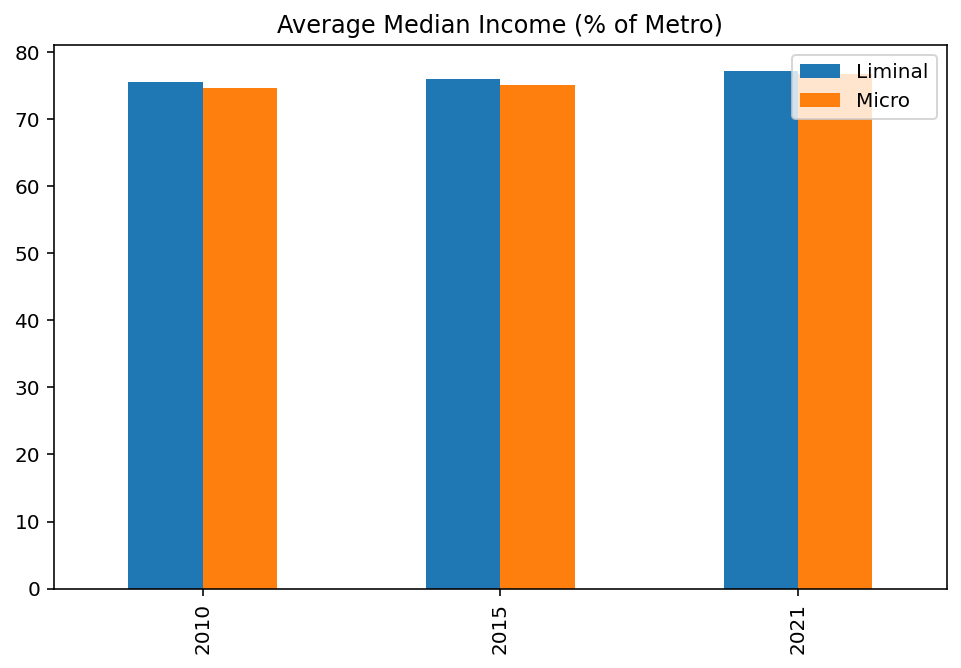

In [4]:
liminal = df19['liminal']
metro = df19['metro']
micro = df19['micro']
notLim = df19['micro'] & ~liminal
other = ~metro & ~micro

df = pd.DataFrame()

for dfY, year in [(df10, 2010), (df15, 2015), (df21, 2021)]:
    metroInc = (dfY[metro]['Median_Income'] * dfY[metro]['Num_Workers']).sum() / dfY[metro]['Num_Workers'].sum()
    df.loc[year, 'Liminal'] = (dfY[liminal]['Median_Income'] * dfY[liminal]['Num_Workers']).sum() / dfY[liminal]['Num_Workers'].sum() / metroInc * 100
    df.loc[year, 'Micro'] = (dfY[notLim]['Median_Income'] * dfY[notLim]['Num_Workers']).sum() / dfY[notLim]['Num_Workers'].sum() / metroInc * 100

df.plot(kind='bar', figsize=(8, 5))
plt.title("Average Median Income (% of Metro)");

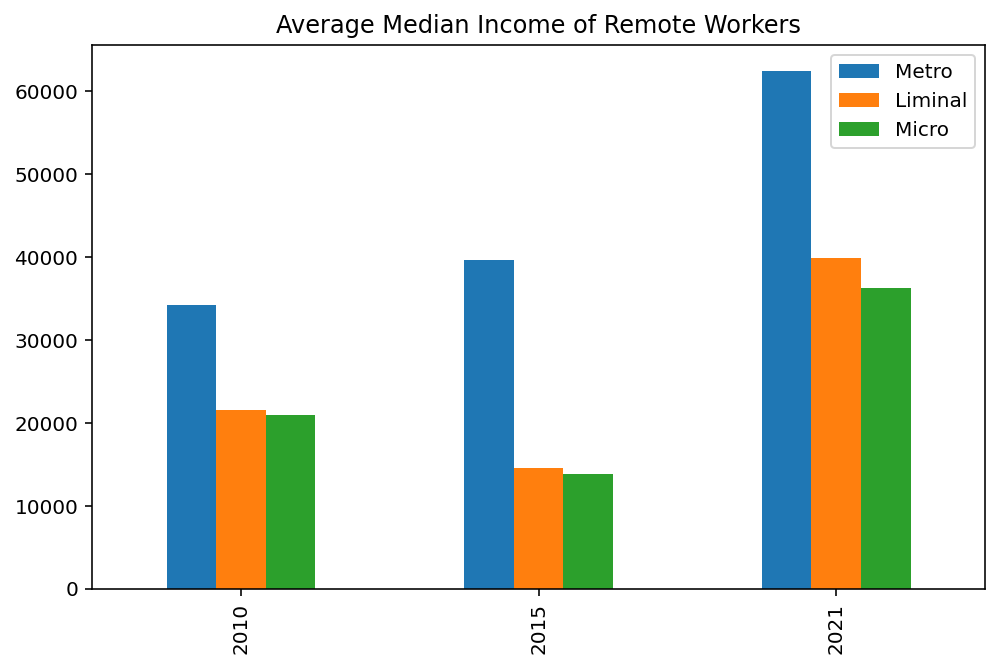

In [5]:
liminal = df19['liminal']
metro = df19['metro']
micro = df19['micro']
notLim = df19['micro'] & ~liminal
other = ~metro & ~micro

df = pd.DataFrame()

for dfY, year in [(df10, 2010), (df15, 2015), (df21, 2021)]:
    df.loc[year, 'Metro'] = (dfY[metro]['Median_Income_Worked_home'] * dfY[metro]['Num_Workers']).sum() / dfY[metro]['Num_Workers'].sum()
    df.loc[year, 'Liminal'] = (dfY[liminal]['Median_Income_Worked_home'] * dfY[liminal]['Num_Workers']).sum() / dfY[liminal]['Num_Workers'].sum()
    df.loc[year, 'Micro'] = (dfY[notLim]['Median_Income_Worked_home'] * dfY[notLim]['Num_Workers']).sum() / dfY[notLim]['Num_Workers'].sum()

df.plot(kind='bar', figsize=(8, 5))
plt.title("Average Median Income of Remote Workers");

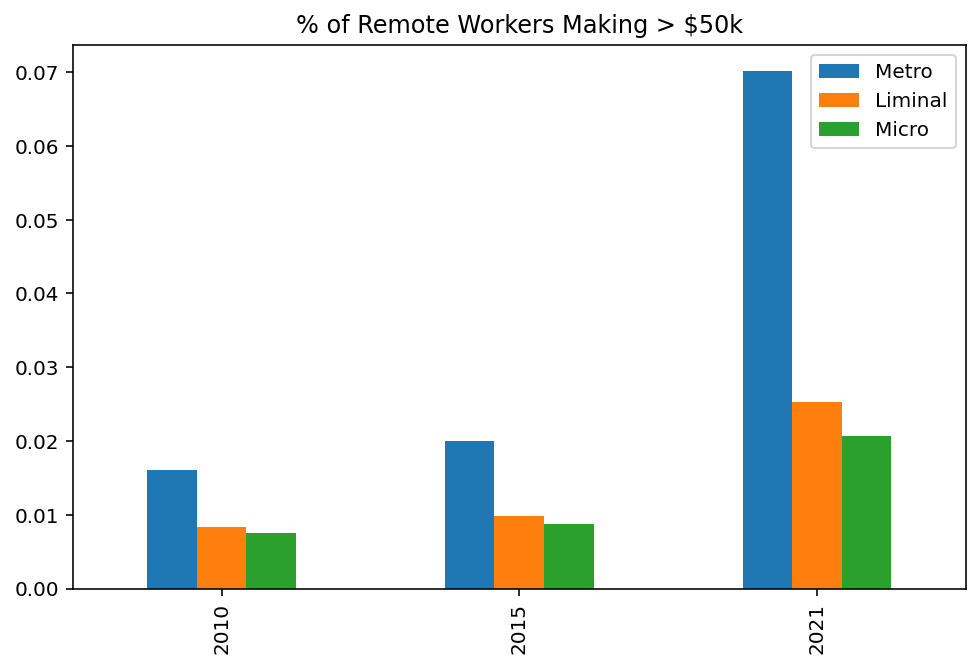

In [6]:
liminal = df19['liminal']
metro = df19['metro']
micro = df19['micro']
notLim = df19['micro'] & ~liminal
other = ~metro & ~micro

df = pd.DataFrame()

for dfY, year in [(df10, 2010), (df15, 2015), (df21, 2021)]:
    df.loc[year, 'Metro'] = (dfY[metro]['Pop_Worked_Home_50k-65k'].sum() + dfY[metro]['Pop_Worked_Home_65k-75k'].sum() + dfY[metro]['Pop_Worked_Home_75k-more'].sum()) / dfY[metro]['Num_Workers'].sum()
    df.loc[year, 'Liminal'] = (dfY[liminal]['Pop_Worked_Home_50k-65k'].sum() + dfY[liminal]['Pop_Worked_Home_65k-75k'].sum() + dfY[liminal]['Pop_Worked_Home_75k-more'].sum()) / dfY[liminal]['Num_Workers'].sum()
    df.loc[year, 'Micro'] = (dfY[notLim]['Pop_Worked_Home_50k-65k'].sum() + dfY[notLim]['Pop_Worked_Home_65k-75k'].sum() + dfY[notLim]['Pop_Worked_Home_75k-more'].sum()) / dfY[notLim]['Num_Workers'].sum()

df.plot(kind='bar', figsize=(8, 5))
plt.title("% of Remote Workers Making > $50k");

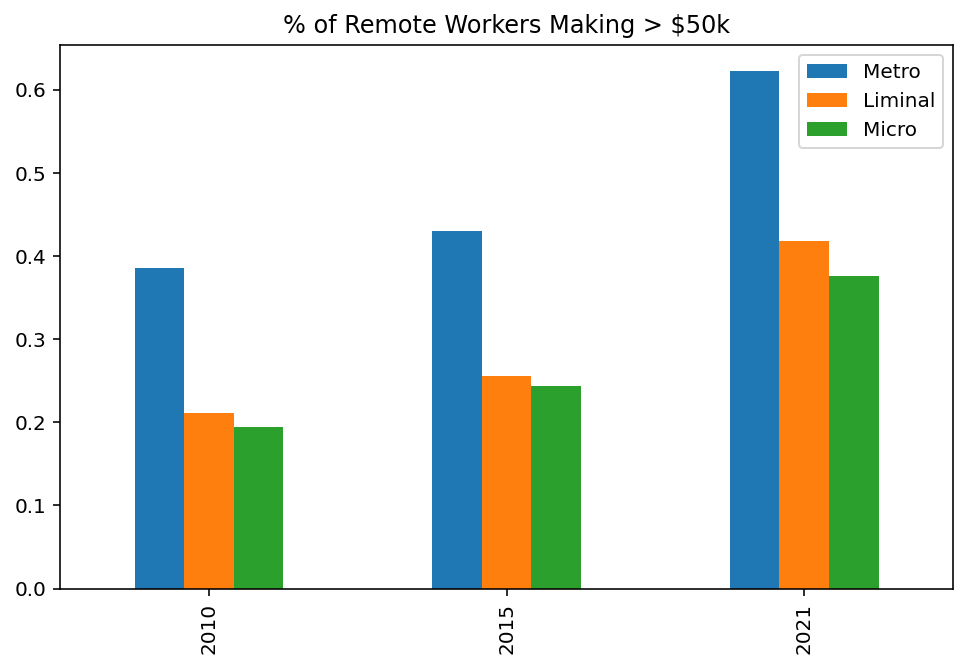

In [7]:
liminal = df19['liminal']
metro = df19['metro']
micro = df19['micro']
notLim = df19['micro'] & ~liminal
other = ~metro & ~micro

df = pd.DataFrame()

for dfY, year in [(df10, 2010), (df15, 2015), (df21, 2021)]:
    df.loc[year, 'Metro'] = (dfY[metro]['Pop_Worked_Home_50k-65k'].sum() + dfY[metro]['Pop_Worked_Home_65k-75k'].sum() + dfY[metro]['Pop_Worked_Home_75k-more'].sum()) / dfY[metro]['Pop_Worked_Home'].sum()
    df.loc[year, 'Liminal'] = (dfY[liminal]['Pop_Worked_Home_50k-65k'].sum() + dfY[liminal]['Pop_Worked_Home_65k-75k'].sum() + dfY[liminal]['Pop_Worked_Home_75k-more'].sum()) / dfY[liminal]['Pop_Worked_Home'].sum()
    df.loc[year, 'Micro'] = (dfY[notLim]['Pop_Worked_Home_50k-65k'].sum() + dfY[notLim]['Pop_Worked_Home_65k-75k'].sum() + dfY[notLim]['Pop_Worked_Home_75k-more'].sum()) / dfY[notLim]['Pop_Worked_Home'].sum()

df.plot(kind='bar', figsize=(8, 5))
plt.title("% of Remote Workers Making > $50k");

### Compare to nearest metro

In [35]:
def getDistance(row, df):
    cent = row['geometry'].centroid
    return min(cent.distance(m['geometry']) for i, m in df[df['metro']].iterrows())

df10['metroDist'] = df10.apply(getDistance, axis=1, args=(df10,))
df15['metroDist'] = df15.apply(getDistance, axis=1, args=(df15,))
df21['metroDist'] = df21.apply(getDistance, axis=1, args=(df21,))

In [36]:
def getNearest(row, df):
    cent = row['geometry'].centroid
    nearest = -1
    minDist = float('inf')
    for i, m in df[df['metro']].iterrows():
        dist = cent.distance(m['geometry'])
        if dist < minDist:
            minDist = dist
            nearest = m['CBSA']
    return nearest

df10['nearestMetro'] = df10.apply(getNearest, axis=1, args=(df10,))
df15['nearestMetro'] = df15.apply(getNearest, axis=1, args=(df15,))
df21['nearestMetro'] = df21.apply(getNearest, axis=1, args=(df21,))

In [37]:
def incomePctOfMetro(row, df):
    return row['Median_Income'] / df[df['CBSA'] == row['nearestMetro']].iloc[0]['Median_Income'] * 100

df10['incomePctOfMetro'] = df10.apply(incomePctOfMetro, axis=1, args=(df10,))
df15['incomePctOfMetro'] = df15.apply(incomePctOfMetro, axis=1, args=(df15,))
df21['incomePctOfMetro'] = df21.apply(incomePctOfMetro, axis=1, args=(df21,))

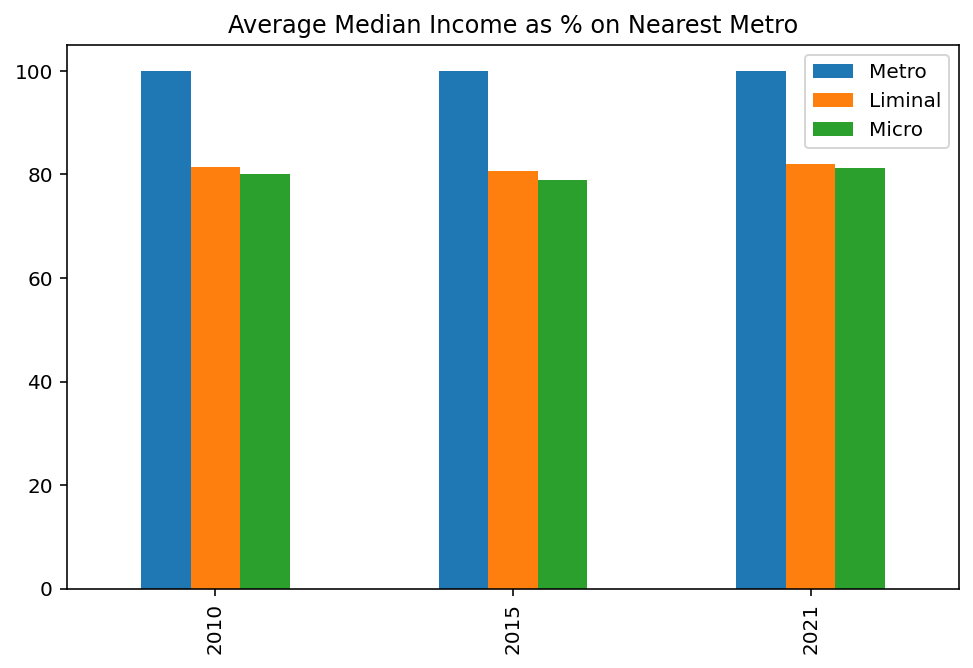

In [38]:
liminal = df19['liminal']
metro = df19['metro']
micro = df19['micro']
notLim = df19['micro'] & ~liminal
other = ~metro & ~micro

df = pd.DataFrame()

for dfY, year in [(df10, 2010), (df15, 2015), (df21, 2021)]:
    df.loc[year, 'Metro'] = (dfY[metro]['incomePctOfMetro'] * dfY[metro]['Num_Workers']).sum() / dfY[metro]['Num_Workers'].sum()
    df.loc[year, 'Liminal'] = (dfY[liminal]['incomePctOfMetro'] * dfY[liminal]['Num_Workers']).sum() / dfY[liminal]['Num_Workers'].sum()
    df.loc[year, 'Micro'] = (dfY[notLim]['incomePctOfMetro'] * dfY[notLim]['Num_Workers']).sum() / dfY[notLim]['Num_Workers'].sum()

df.plot(kind='bar', figsize=(8, 5))
plt.title("Average Median Income as % on Nearest Metro");

In [39]:
df

,Metro,Liminal,Micro
2010,100.0,81.446356,80.022608
2015,100.0,80.598564,78.948475
2021,100.0,81.949301,81.213560


(0.0, 1000000.0)

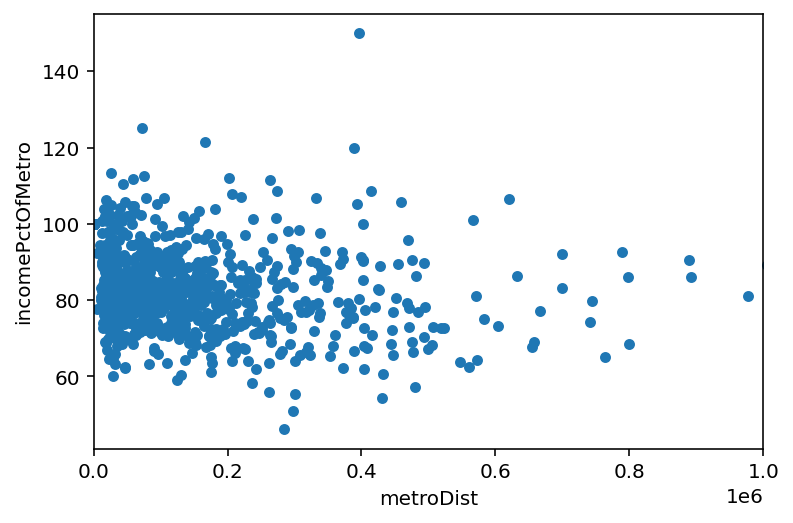

In [40]:
df21.plot.scatter(x='metroDist', y='incomePctOfMetro')
plt.xlim(0, 1000_000)

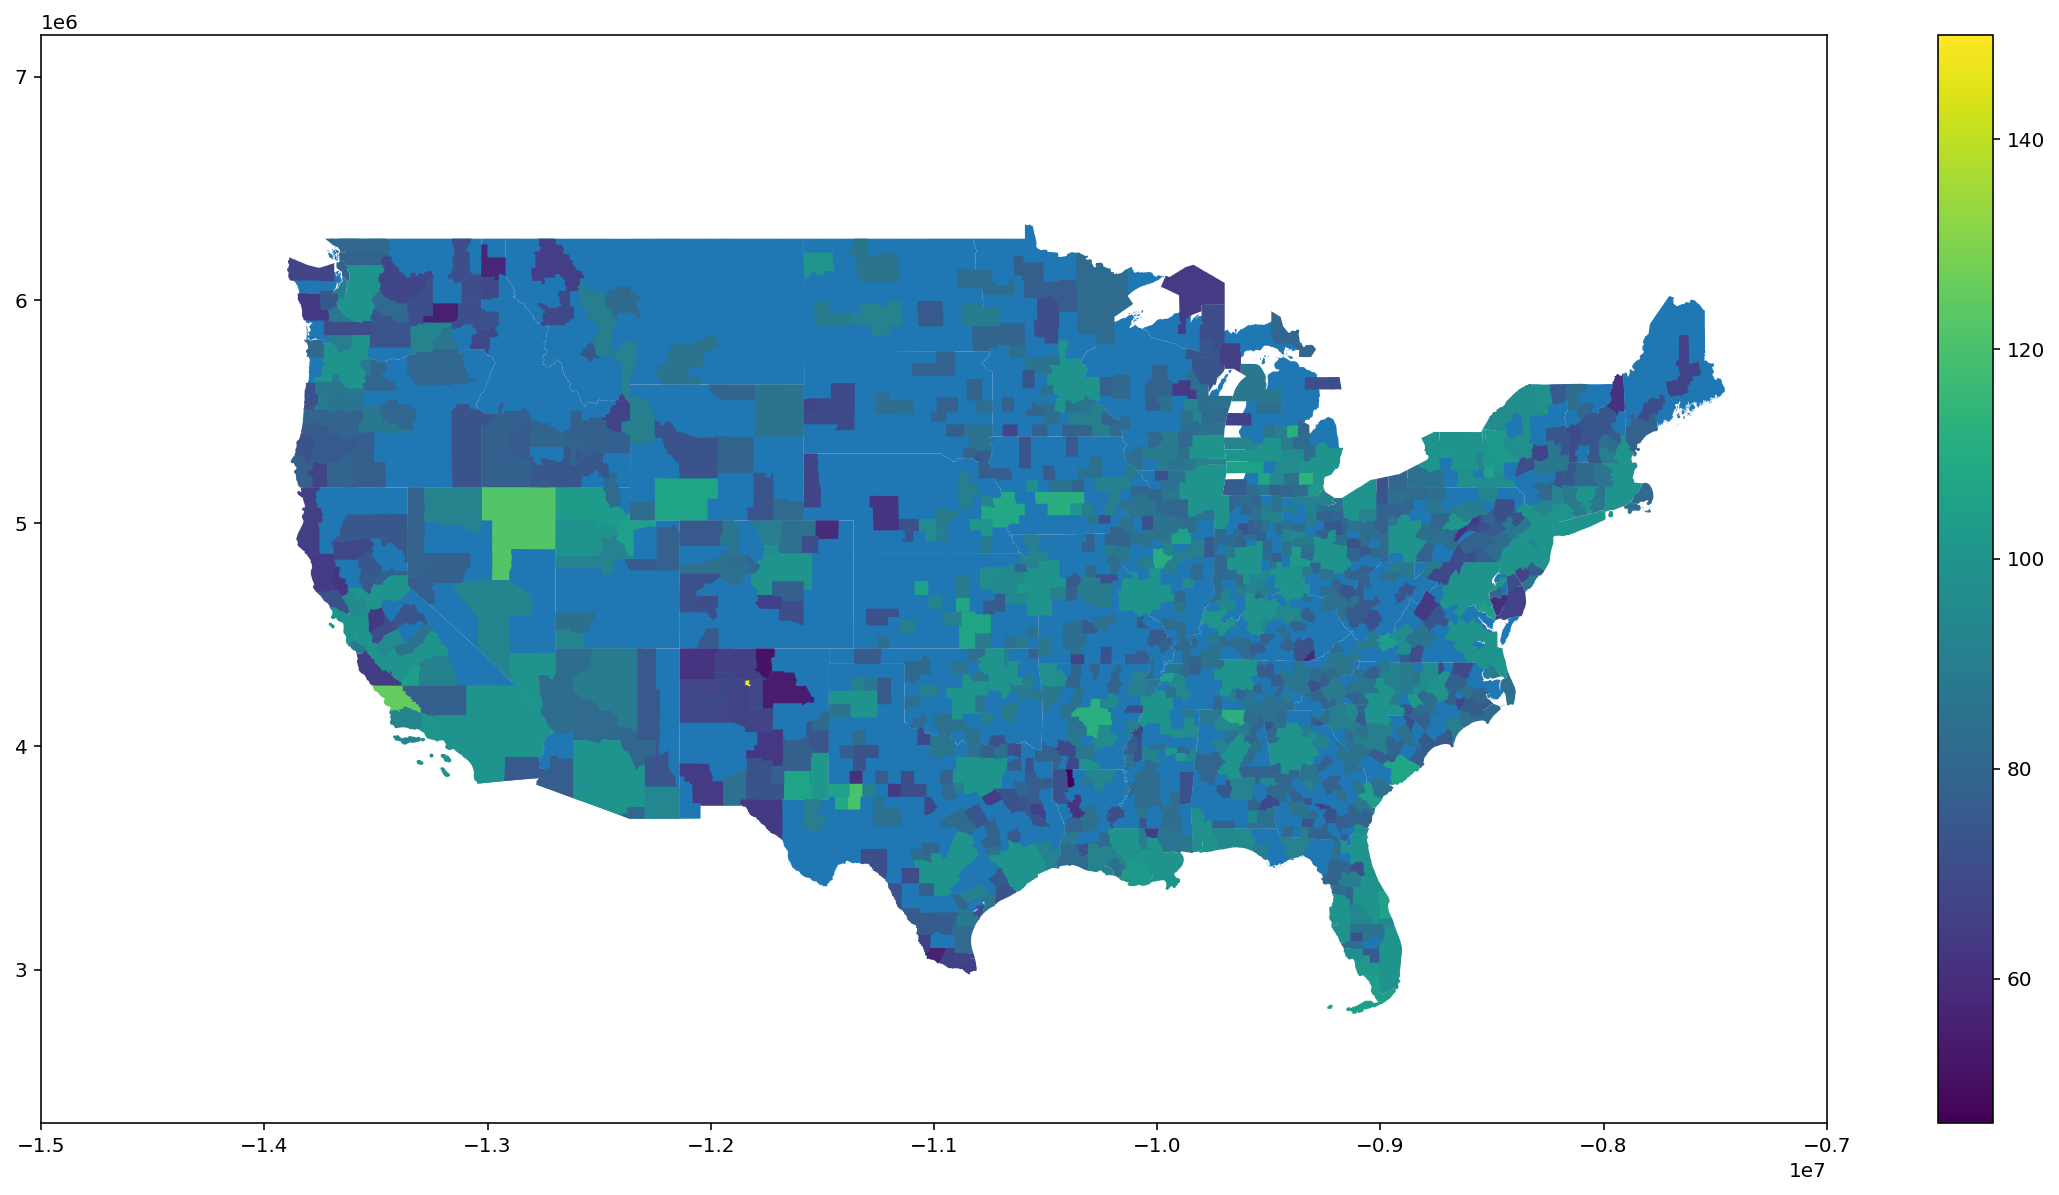

In [41]:
ax = plotUS()
df21.plot(ax=ax, column='incomePctOfMetro', legend=True);

### By single year

In [50]:
df = pd.read_csv('Unemployment.csv')
df = df[df['Attribute'] == 'Median_Household_Income_2021']

In [51]:
xwalk = pd.read_pickle(dataFolder + "/xwalk_data_combined.pkl")
#Extract block group code
xwalk['fips'] = (xwalk['bgrp'] / 10**7).astype(int)
fipsToCbsa = xwalk.groupby('fips').first()['cbsa']
fipsToCbsa = dict(zip(fipsToCbsa.index, fipsToCbsa.values)) #Dict is faster for lookup

In [52]:
df['CBSA'] = df['FIPS_Code'].apply(lambda c: fipsToCbsa.get(c, 99999))

In [57]:
df = df.groupby(by='CBSA').agg({
    'Value': 'mean'
}).reset_index()
dfInc = pd.merge(df, df21, on='CBSA')

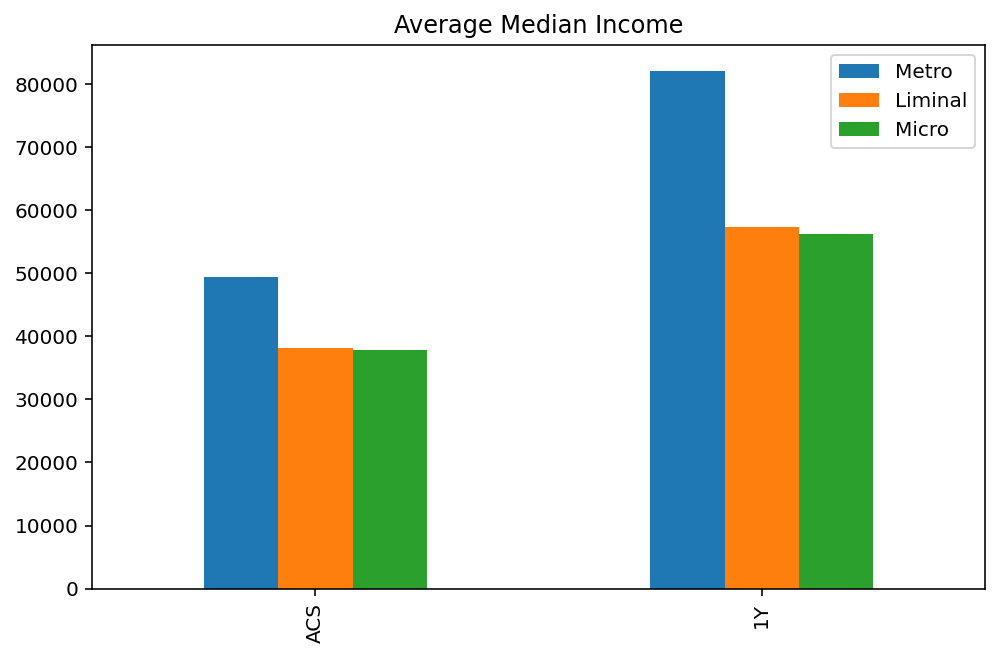

In [59]:
liminal = dfInc['liminal']
metro = dfInc['metro']
micro = dfInc['micro']
notLim = dfInc['micro'] & ~liminal
other = ~metro & ~micro

df = pd.DataFrame()

df.loc['ACS', 'Metro'] = (dfInc[metro]['Median_Income'] * dfInc[metro]['Num_Workers']).sum() / dfInc[metro]['Num_Workers'].sum()
df.loc['ACS', 'Liminal'] = (dfInc[liminal]['Median_Income'] * dfInc[liminal]['Num_Workers']).sum() / dfInc[liminal]['Num_Workers'].sum()
df.loc['ACS', 'Micro'] = (dfInc[notLim]['Median_Income'] * dfInc[notLim]['Num_Workers']).sum() / dfInc[notLim]['Num_Workers'].sum()


df.loc['1Y', 'Metro'] = (dfInc[metro]['Value'] * dfInc[metro]['Num_Workers']).sum() / dfInc[metro]['Num_Workers'].sum()
df.loc['1Y', 'Liminal'] = (dfInc[liminal]['Value'] * dfInc[liminal]['Num_Workers']).sum() / dfInc[liminal]['Num_Workers'].sum()
df.loc['1Y', 'Micro'] = (dfInc[notLim]['Value'] * dfInc[notLim]['Num_Workers']).sum() / dfInc[notLim]['Num_Workers'].sum()

df.plot(kind='bar', figsize=(8, 5))
plt.title("Average Median Income");

In [17]:
df = pd.read_csv('data/CAINC1_TX_1969_2021.csv', skipfooter=4, engine='python')

In [18]:
df['FIPS'] = df['GeoFIPS'].apply(lambda s: int(s.replace('"', '').strip()))

In [21]:
dfInc = df[df['LineCode'] == 1].drop(columns='LineCode')

In [22]:
incByCbsa = dfInc.groupby(by='CBSA').agg({
    '2010': 'mean',
    '2015': 'mean',
    '2021': 'mean'
}).reset_index()

In [24]:
incByCbsa = pd.merge(incByCbsa, df21, on='CBSA')

In [33]:
incByCbsa

,CBSA,2010,2015,2021,NAME,geometry,LSAD,metro,micro,inBuff,...,Pct_Less_HS,Pct_HS_Grad,Pct_Some_College,Pct_Bachelors,Pct_Grad,Pct_BS_Above,Pct_HS_Above,Tot_Bldgs,Tot_Units,Tot_Bldgs_Value
0,10180,1.934832e+06,2.316131e+06,3.283634e+06,"Abilene, TX","POLYGON ((-11148262.500 3832132.455, -11148249...",Metropolitan Statistical Area,False,False,True,...,0.117625,0.311462,0.317737,0.163712,0.089464,0.253176,0.882375,557.0,883.0,150495424.0
1,10860,8.720175e+05,1.037162e+06,1.241609e+06,"Alice, TX","POLYGON ((-10935188.672 3156304.228, -10935357...",Micropolitan Statistical Area,False,True,True,...,0.223956,0.366604,0.267015,0.106437,0.035988,0.142425,0.776044,5.0,5.0,879000.0
2,11100,1.927559e+06,2.299166e+06,3.034058e+06,"Amarillo, TX","POLYGON ((-11373231.116 4188809.460, -11375197...",Metropolitan Statistical Area,False,False,False,...,0.138463,0.273010,0.339941,0.169836,0.078750,0.248586,0.861537,703.0,736.0,168531185.0
3,11380,5.475710e+05,8.311770e+05,9.762650e+05,"Andrews, TX","POLYGON ((-11451045.111 3774755.164, -11451065...",Micropolitan Statistical Area,False,True,False,...,0.239356,0.313046,0.259370,0.139283,0.048945,0.188228,0.760644,20.0,20.0,4181516.0
4,11980,2.455472e+06,2.957794e+06,4.065751e+06,"Athens, TX","POLYGON ((-10680050.868 3810273.785, -10680048...",Micropolitan Statistical Area,False,True,True,...,0.151590,0.335909,0.330434,0.120471,0.061596,0.182067,0.848410,242.0,243.0,53193895.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,46900,4.559760e+05,5.119310e+05,7.632550e+05,"Vernon, TX","POLYGON ((-11073539.382 4040303.970, -11073550...",Micropolitan Statistical Area,False,True,True,...,0.214392,0.331500,0.300905,0.115160,0.038043,0.153203,0.785608,2.0,2.0,435000.0
67,47020,1.744476e+06,2.284696e+06,2.860128e+06,"Victoria, TX","POLYGON ((-10832045.471 3358352.093, -10831624...",Metropolitan Statistical Area,False,True,True,...,0.163565,0.304631,0.339207,0.136186,0.056411,0.192597,0.836435,231.0,391.0,59295800.0
68,47380,4.020690e+06,4.947651e+06,6.891624e+06,"Waco, TX","POLYGON ((-10828950.388 3669139.604, -10829705...",Metropolitan Statistical Area,False,False,True,...,0.140892,0.273822,0.332104,0.159749,0.093434,0.253183,0.859108,1023.0,1107.0,131485594.0
69,48660,1.931148e+06,2.060363e+06,2.528513e+06,"Wichita Falls, TX","POLYGON ((-11015420.405 4006537.127, -11015420...",Metropolitan Statistical Area,False,False,True,...,0.114440,0.333008,0.322210,0.152417,0.077925,0.230342,0.885560,190.0,191.0,45583195.0


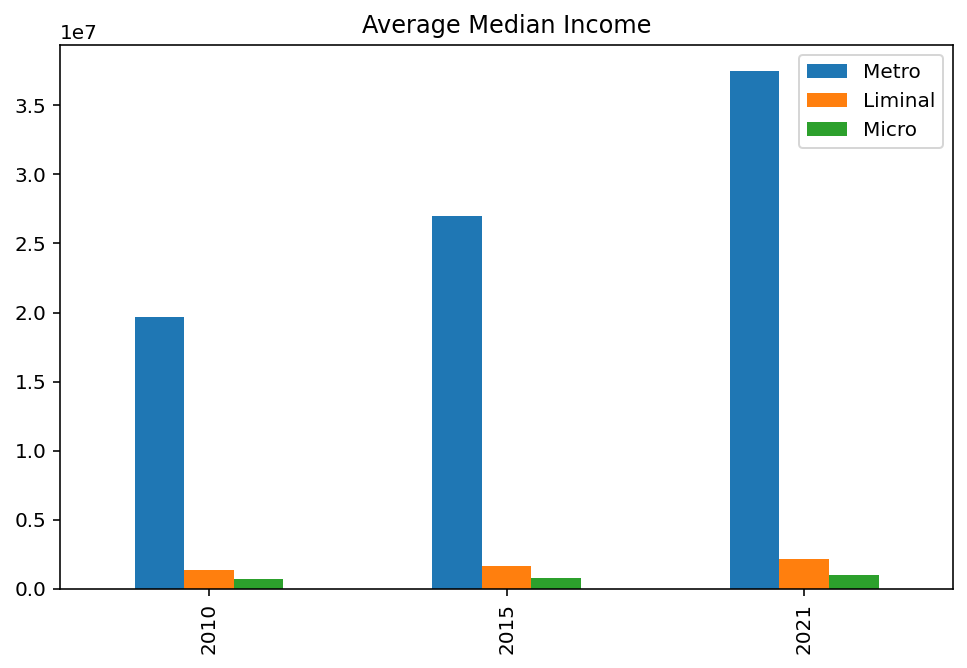

In [35]:
liminal = incByCbsa['liminal']
metro = incByCbsa['metro']
micro = incByCbsa['micro']
notLim = incByCbsa['micro'] & ~liminal
other = ~metro & ~micro

df = pd.DataFrame()

for _, year in [(df10, 2010), (df15, 2015), (df21, 2021)]:
    col = incByCbsa[str(year)]
    df.loc[year, 'Metro'] = col[metro].mean()
    df.loc[year, 'Liminal'] = col[liminal].mean()
    df.loc[year, 'Micro'] = col[notLim].mean()

df.plot(kind='bar', figsize=(8, 5))
plt.title("Average Median Income");